In [1]:
import os
TEUFEL_ROOT = os.path.abspath("..")
os.chdir(TEUFEL_ROOT)

import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

TEUFEL - THz Emission from Undulators and Free-Electron Lasers


In [2]:
os.chdir('/home/lehnertu/Programming/teufel')

In [3]:
!ls

build				    fel-modulation_stop.h5
clean_tests			    lib
CMakeLists.txt			    LICENSE
doc				    matching.sdds
examples			    rad_push_log.sdds
fel1d-modulation_beam.sdds	    README.md
fel1d-modulation_field.hdf5	    run_tests
fel1d-modulation_final.h5	    scripts
fel1d-modulation_initial.h5	    setup.dox
fel1d-modulation_trajectories.hdf5  slurm.teufel.sh
fel1d-radiation_field.hdf5	    src
fel1d-radiation_probe.hdf5	    tests
fel-modulation_beam.sdds	    teufel_bunch_start.sdds
fel-modulation_final.h5		    undulator_traj.hdf5
fel-modulation_initial.h5	    warnings.dox
fel-modulation_start.h5


In [4]:
hdf = h5py.File('fel1d-radiation_probe.hdf5', "r")
print(hdf)

<HDF5 file "fel1d-radiation_probe.hdf5" (mode r)>


In [5]:
# Get the group
traj = hdf['Probe']
NOTS = traj.attrs.get('NOTS')
NOP = traj.attrs.get('NOP')
NOD = traj.attrs.get('NOD')
print(NOTS, NOP, NOD)
a = np.array(traj)
print(a.shape)

5004 1 16
(5004, 1, 16)


In [6]:
hdf.close()

- 0 : 1x time
- 1 : 3x position
- 4 : 3x momentum
- 7 : 3x acceleration
-10 : 3x E
-13 : 3x B

In [12]:
βγ = np.sqrt(a[0,0,4]**2 + a[0,0,5]**2 + a[0,0,6]**2)
print(f'βγ = {βγ:.3f}')
γ = np.sqrt(βγ**2 + 1)
print(f'γ = {γ:.3f}')


βγ = 59.700
γ = 59.709


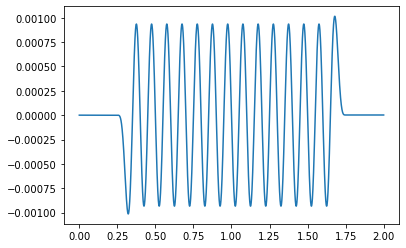

In [7]:
x = a[:,0,1]
z = a[:,0,3]
plt.plot(z,x)
plt.show()

0.05865125241459949


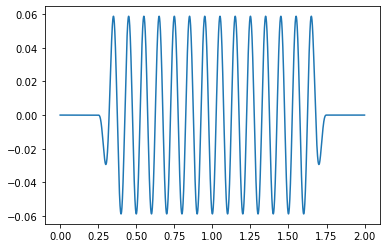

In [15]:
xp = a[:,0,4]/βγ
print(np.max(xp))
z = a[:,0,3]
plt.plot(z,xp)
plt.show()

1.105e+09


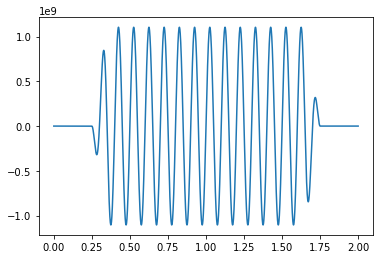

In [19]:
Ax = a[:,0,7]/βγ
print(f'{np.max(Ax):.4g}')
z = a[:,0,3]
plt.plot(z,Ax)
plt.show()

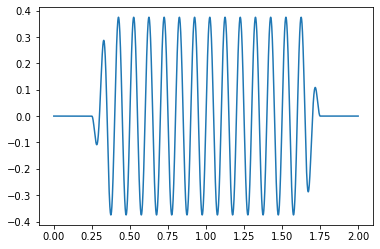

In [9]:
By = a[:,0,14]
z = a[:,0,3]
plt.plot(z,By)
plt.show()